In [1]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

conn.commit()
conn.close()

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

data = [
    ("Apples", 10, 1.5),
    ("Oranges", 5, 2.0),
    ("Apples", 20, 1.5),
    ("Bananas", 15, 1.2),
    ("Oranges", 10, 2.0),
    ("Bananas", 5, 1.2)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)

conn.commit()
conn.close()

In [3]:
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
conn.close()

print(df)

   product  total_qty  revenue
0   Apples         30     45.0
1  Bananas         20     24.0
2  Oranges         15     30.0


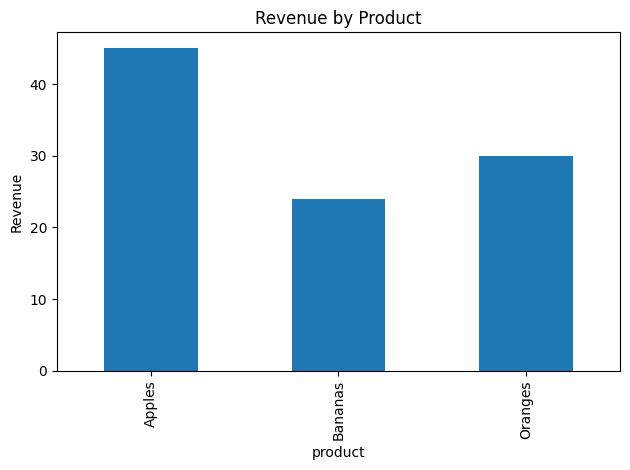

In [4]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional
plt.show()